# imports

In [52]:
# imports:
import pandas as pd
import numpy as np

# import regex module
import re

# graphs:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# display all the columns in dataframe
pd.set_option('display.max_columns', None)

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/aps0611/experimental/main/dataset/CROPS/output.csv')

In [54]:
df.head(5)

,Unnamed: 0,Program,Year,Period,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,"CORN, GRAIN - ACRES HARVESTED",CORN-production in BU,CORN Production in Kg,BARLEY - ACRES HARVESTED,BARLEY PRODUCTION IN BU,BARLEY PRODUCTION IN Kg,RICE - ACRES HARVESTED,"RICE - PRODUCTION, MEASURED IN CWT",Rice Production in Kg,"SUGARCANE, SUGAR - ACRES HARVESTED","SUGARCANE, SUGAR - PRODUCTION, MEASURED IN TONS",SUGAR PRODUCTION in KG,WHEAT - ACRES HARVESTED,"WHEAT - PRODUCTION, MEASURED IN BU",Wheat Production measured in Kg,CATTLE,precipitation_cm,Latitude,Longitude,Corn-LUC,Corn-Farm,Corn-EUTROPHYING,Corn Total,BARLEY-LUC,Barley-Farm,BARLEY-EUTROPHYING,Barley-Total,RICE-LUC,Rice-Farm,Rice- Eutrophication,Rice-total,Sugarcane- LUC,Sugarcane-Farm,Sugarcane-Eutrophication,Sugarcane Total,Wheat-LUC,Wheat-Farm,Wheat-Eutrophication,Wheat-total,Cattle,Livestock,Crops total,Livestock- MMT,Crops-Tonnes,Crop MMT,Crop-Scope1-MMT
0,0.0,CENSUS,2017.0,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,AUTAUGA,1.0,645.0,86350.0,3042893.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,20485.0,721872.36,8678.0,148.0,32.52,-86.63,912868.12,2434314.98,0.0,3347183.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72187.24,144374.47,0.0,216561.71,512002.0,512002.0,3563744.81,0.0,3563.74,0.00,0.00
1,1.0,CENSUS,2017.0,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,BULLOCK,11.0,1292.0,109325.0,3852511.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,148.0,32.10,-85.71,1155753.41,3082009.10,0.0,4237762.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,4237762.51,0.0,4237.76,0.00,0.00
2,2.0,CENSUS,2017.0,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,DALLAS,47.0,13876.0,1933303.0,68127800.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,14589.0,148.0,32.31,-87.10,20438340.16,54502240.42,0.0,74940580.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,860751.0,860751.0,74940580.57,0.0,74940.58,0.07,0.05
3,3.0,CENSUS,2017.0,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,ELMORE,51.0,2487.0,414272.0,14598560.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6893.0,148.0,32.58,-86.13,4379568.05,11678848.14,0.0,16058416.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,406687.0,406687.0,16058416.19,0.0,16058.42,0.02,0.01
4,4.0,CENSUS,2017.0,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,GREENE,63.0,34.0,615.0,21672.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,148.0,32.86,-87.99,6501.61,17337.62,0.0,23839.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,23839.23,0.0,23.84,0.00,0.00


In [55]:
# determine the shape
df.shape

(2706, 57)

In [56]:
### check the columns

df.columns

Index(['Unnamed: 0', 'Program', 'Year', 'Period', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'CORN, GRAIN - ACRES HARVESTED', 'CORN-production in BU',
       'CORN Production in Kg', 'BARLEY - ACRES HARVESTED',
       'BARLEY PRODUCTION IN BU', 'BARLEY PRODUCTION IN Kg',
       'RICE - ACRES HARVESTED', 'RICE - PRODUCTION, MEASURED IN CWT',
       'Rice Production in Kg', 'SUGARCANE, SUGAR - ACRES HARVESTED',
       'SUGARCANE, SUGAR - PRODUCTION, MEASURED IN TONS',
       'SUGAR PRODUCTION in KG', 'WHEAT - ACRES HARVESTED',
       'WHEAT - PRODUCTION, MEASURED IN BU', 'Wheat Production measured in Kg',
       'CATTLE', 'precipitation_cm', 'Latitude', 'Longitude', 'Corn-LUC',
       'Corn-Farm', 'Corn-EUTROPHYING', 'Corn Total', 'BARLEY-LUC',
       'Barley-Farm', 'BARLEY-EUTROPHYING', 'Barley-Total', 'RICE-LUC',
       'Rice-Farm', 'Rice- Eutrophication', 'Rice-total', 'Sugarcane- LUC',
       'Sugarcane-Farm', 'Sugarc

In [57]:
## create a new df1 with all the needed columns

df1 = df[['Latitude',
          'Longitude',
          'State',
          'County',
          'CORN, GRAIN - ACRES HARVESTED','CORN Production in Kg',
          'BARLEY - ACRES HARVESTED','BARLEY PRODUCTION IN Kg',
          'RICE - ACRES HARVESTED', 'Rice Production in Kg',
          'SUGARCANE, SUGAR - ACRES HARVESTED','SUGAR PRODUCTION in KG',
          'WHEAT - ACRES HARVESTED','Wheat Production measured in Kg',
          'CATTLE', 'precipitation_cm',
          'Corn-LUC','Corn-Farm', 'Corn-EUTROPHYING',
          'BARLEY-LUC','Barley-Farm', 'BARLEY-EUTROPHYING',
           'RICE-LUC','Rice-Farm', 'Rice- Eutrophication',
          'Sugarcane- LUC','Sugarcane-Farm', 'Sugarcane-Eutrophication',
           'Wheat-LUC', 'Wheat-Farm', 'Wheat-Eutrophication',
          'Livestock- MMT',
          'Crop-Scope1-MMT'
            ]]

In [58]:
df1.head(5)

,Latitude,Longitude,State,County,"CORN, GRAIN - ACRES HARVESTED",CORN Production in Kg,BARLEY - ACRES HARVESTED,BARLEY PRODUCTION IN Kg,RICE - ACRES HARVESTED,Rice Production in Kg,"SUGARCANE, SUGAR - ACRES HARVESTED",SUGAR PRODUCTION in KG,WHEAT - ACRES HARVESTED,Wheat Production measured in Kg,CATTLE,precipitation_cm,Corn-LUC,Corn-Farm,Corn-EUTROPHYING,BARLEY-LUC,Barley-Farm,BARLEY-EUTROPHYING,RICE-LUC,Rice-Farm,Rice- Eutrophication,Sugarcane- LUC,Sugarcane-Farm,Sugarcane-Eutrophication,Wheat-LUC,Wheat-Farm,Wheat-Eutrophication,Livestock- MMT,Crop-Scope1-MMT
0,32.52,-86.63,ALABAMA,AUTAUGA,645.0,3042893.73,0.0,0.0,0.0,0.0,0.0,0.0,334.0,721872.36,8678.0,148.0,912868.12,2434314.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72187.24,144374.47,0.0,0.0,0.00
1,32.10,-85.71,ALABAMA,BULLOCK,1292.0,3852511.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,148.0,1155753.41,3082009.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00
2,32.31,-87.10,ALABAMA,DALLAS,13876.0,68127800.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,14589.0,148.0,20438340.16,54502240.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.05
3,32.58,-86.13,ALABAMA,ELMORE,2487.0,14598560.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6893.0,148.0,4379568.05,11678848.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.01
4,32.86,-87.99,ALABAMA,GREENE,34.0,21672.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,148.0,6501.61,17337.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00


In [59]:
df1.describe()

,Latitude,Longitude,"CORN, GRAIN - ACRES HARVESTED",CORN Production in Kg,BARLEY - ACRES HARVESTED,BARLEY PRODUCTION IN Kg,RICE - ACRES HARVESTED,Rice Production in Kg,"SUGARCANE, SUGAR - ACRES HARVESTED",SUGAR PRODUCTION in KG,WHEAT - ACRES HARVESTED,Wheat Production measured in Kg,CATTLE,precipitation_cm,Corn-LUC,Corn-Farm,Corn-EUTROPHYING,BARLEY-LUC,Barley-Farm,BARLEY-EUTROPHYING,RICE-LUC,Rice-Farm,Rice- Eutrophication,Sugarcane- LUC,Sugarcane-Farm,Sugarcane-Eutrophication,Wheat-LUC,Wheat-Farm,Wheat-Eutrophication,Livestock- MMT,Crop-Scope1-MMT
count,2705.000000,2705.000000,2705.000000,2.705000e+03,2705.000000,2.705000e+03,2705.000000,2.705000e+03,2705.000000,2.705000e+03,2705.000000,2.705000e+03,2705.000000,2705.000000,2.705000e+03,2.705000e+03,2705.0,2705.0,2.705000e+03,2705.0,2705.0,2.705000e+03,2.705000e+03,2.705000e+03,2.705000e+03,2.705000e+03,2.705000e+03,2.705000e+03,2705.0,2706.000000,2706.000000
mean,38.331834,-90.761590,31268.403327,1.921502e+08,620.501664,1.635201e+06,810.425878,2.725664e+06,191.180776,7.298128e+06,13708.748244,2.214730e+07,7906.114233,98.020407,5.764506e+07,1.537202e+08,0.0,0.0,3.270402e+05,0.0,0.0,9.812390e+06,2.592106e+07,8.757753e+06,3.649064e+06,3.517698e+07,2.214730e+06,4.429460e+06,0.0,0.000469,0.465665
std,4.765790,10.532316,50129.493374,3.359263e+08,3601.515775,1.071195e+07,6633.856134,2.264999e+07,5537.540124,2.298649e+08,40335.675674,6.651549e+07,11095.030268,31.179485,1.007779e+08,2.687410e+08,0.0,0.0,2.142390e+06,0.0,0.0,8.153996e+07,2.154014e+08,2.758379e+08,1.149324e+08,1.107949e+09,6.651549e+06,1.330310e+07,0.0,0.024223,12.180951
min,2.170000,-159.560000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,24.100000,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000
25%,34.860000,-97.130000,486.000000,1.938043e+06,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,175.000000,73.400000,5.814129e+05,1.550435e+06,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000
50%,38.460000,-89.420000,6052.000000,2.998750e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1047.000000,2.053381e+06,3374.000000,99.600000,8.996249e+06,2.399000e+07,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.053381e+05,4.106761e+05,0.0,0.000000,0.030000
75%,41.680000,-83.370000,41952.000000,2.214803e+08,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,6097.000000,1.239517e+07,11343.000000,124.200000,6.644408e+07,1.771842e+08,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.239517e+06,2.479033e+06,0.0,0.000000,0.230000
max,48.830000,-68.300000,319973.000000,2.170859e+09,68414.000000,2.358618e+08,125348.000000,4.263658e+08,275442.000000,1.160422e+10,524203.000000,1.327880e+09,96467.000000,161.800000,6.512578e+08,1.736687e+09,0.0,0.0,4.717235e+07,0.0,0.0,1.534917e+09,4.054739e+09,1.392507e+10,5.802111e+09,5.593235e+10,1.327880e+08,2.655761e+08,0.0,1.260000,630.360000


OBSERVATIONS:

1. Lot of Zero's in dataset: >> Cant replace since we have to keep it as close to real dataset as possible
2. Few features with LUC: all zeros can remove them from the dataset

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2706 entries, 0 to 2705
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Latitude                            2705 non-null   float64
 1   Longitude                           2705 non-null   float64
 2   State                               2705 non-null   object 
 3   County                              2705 non-null   object 
 4   CORN, GRAIN - ACRES HARVESTED       2705 non-null   float64
 5   CORN Production in Kg               2705 non-null   float64
 6   BARLEY - ACRES HARVESTED            2705 non-null   float64
 7   BARLEY PRODUCTION IN Kg             2705 non-null   float64
 8   RICE - ACRES HARVESTED              2705 non-null   float64
 9   Rice Production in Kg               2705 non-null   float64
 10  SUGARCANE, SUGAR - ACRES HARVESTED  2705 non-null   float64
 11  SUGAR PRODUCTION in KG              2705 no

In [61]:
#df1 = df1.drop(df1[df1['CO2'] == 0].index)

In [62]:
df1.shape

(2706, 33)

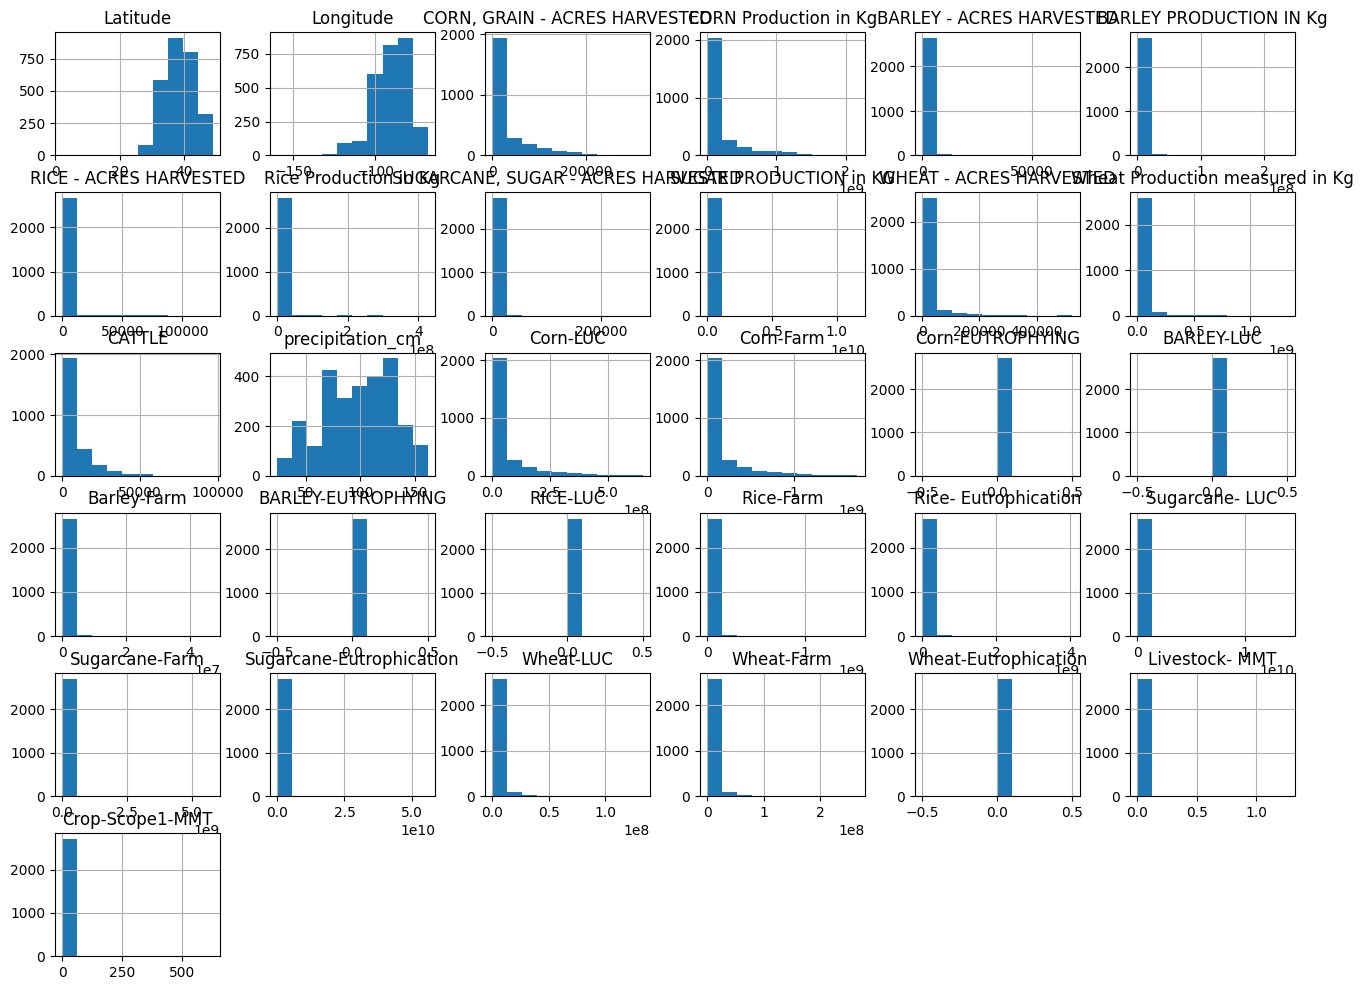

In [63]:
df1.hist(bins=10,figsize = (16,12))
plt.show()

Since our dataset has lot of zeros:

In [64]:
df1 = df1.drop(df1.index[-1])

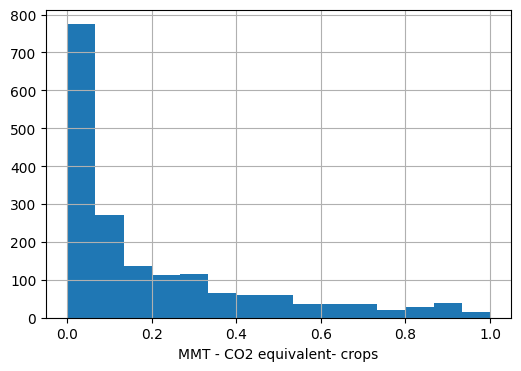

In [65]:
filtered_data = df1[df1['Crop-Scope1-MMT'] != 0]
ax = filtered_data['Crop-Scope1-MMT'].hist(bins=15, figsize=(6, 4), range = (0,1))
ax.set_xlabel("MMT - CO2 equivalent- crops")
plt.show()


* Since the data is at county level: Majority of counties emissions are in range of 0.0-1.0 MMT CO2 equivalent
* Data set is Right Skewed. However, this does not necessarily signify the outliers. This is the characteristics of the data

It would be interesting to see which counties are producing the highest emissions

In [66]:
df1.replace(np.float(0),np.nan, inplace= True)
df1.head(5)

,Latitude,Longitude,State,County,"CORN, GRAIN - ACRES HARVESTED",CORN Production in Kg,BARLEY - ACRES HARVESTED,BARLEY PRODUCTION IN Kg,RICE - ACRES HARVESTED,Rice Production in Kg,"SUGARCANE, SUGAR - ACRES HARVESTED",SUGAR PRODUCTION in KG,WHEAT - ACRES HARVESTED,Wheat Production measured in Kg,CATTLE,precipitation_cm,Corn-LUC,Corn-Farm,Corn-EUTROPHYING,BARLEY-LUC,Barley-Farm,BARLEY-EUTROPHYING,RICE-LUC,Rice-Farm,Rice- Eutrophication,Sugarcane- LUC,Sugarcane-Farm,Sugarcane-Eutrophication,Wheat-LUC,Wheat-Farm,Wheat-Eutrophication,Livestock- MMT,Crop-Scope1-MMT
0,32.52,-86.63,ALABAMA,AUTAUGA,645.0,3042893.73,NaN,NaN,NaN,NaN,NaN,NaN,334.0,721872.36,8678.0,148.0,912868.12,2434314.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72187.24,144374.47,NaN,NaN,NaN
1,32.10,-85.71,ALABAMA,BULLOCK,1292.0,3852511.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.0,1155753.41,3082009.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32.31,-87.10,ALABAMA,DALLAS,13876.0,68127800.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14589.0,148.0,20438340.16,54502240.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05
3,32.58,-86.13,ALABAMA,ELMORE,2487.0,14598560.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6893.0,148.0,4379568.05,11678848.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01
4,32.86,-87.99,ALABAMA,GREENE,34.0,21672.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.0,6501.61,17337.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


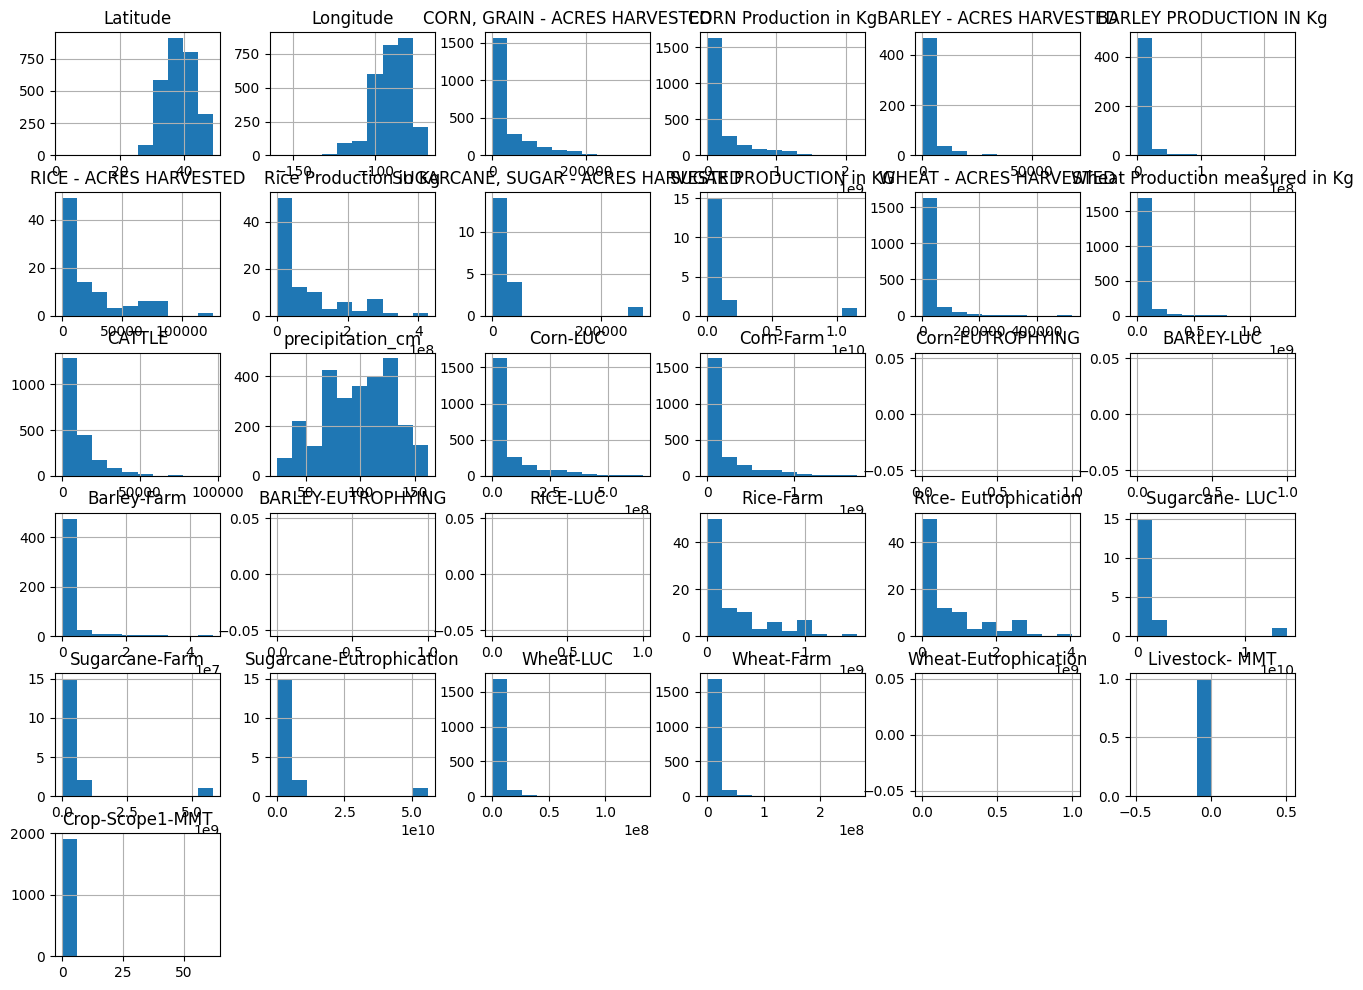

In [67]:
df1.hist(bins=10,figsize = (16,12))
plt.show()

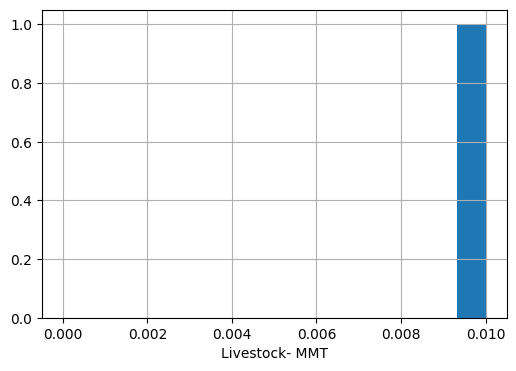

In [68]:
filtered_data = df1[df1['Livestock- MMT'] != 0]
ax = filtered_data['Livestock- MMT'].hist(bins=15, figsize=(6, 4), range = (0,0.01))
ax.set_xlabel("Livestock- MMT")
plt.show()

MMT Contributions are too less- Better we drop the feature

In [69]:
df1['Livestock- MMT'].min()

0.01

In [70]:
filtered_data['Crop-Scope1-MMT'].min()

0.01

In [71]:
filtered_data['Crop-Scope1-MMT'].max()

61.74

In [72]:
df1.columns

Index(['Latitude', 'Longitude', 'State', 'County',
       'CORN, GRAIN - ACRES HARVESTED', 'CORN Production in Kg',
       'BARLEY - ACRES HARVESTED', 'BARLEY PRODUCTION IN Kg',
       'RICE - ACRES HARVESTED', 'Rice Production in Kg',
       'SUGARCANE, SUGAR - ACRES HARVESTED', 'SUGAR PRODUCTION in KG',
       'WHEAT - ACRES HARVESTED', 'Wheat Production measured in Kg', 'CATTLE',
       'precipitation_cm', 'Corn-LUC', 'Corn-Farm', 'Corn-EUTROPHYING',
       'BARLEY-LUC', 'Barley-Farm', 'BARLEY-EUTROPHYING', 'RICE-LUC',
       'Rice-Farm', 'Rice- Eutrophication', 'Sugarcane- LUC', 'Sugarcane-Farm',
       'Sugarcane-Eutrophication', 'Wheat-LUC', 'Wheat-Farm',
       'Wheat-Eutrophication', 'Livestock- MMT', 'Crop-Scope1-MMT'],
      dtype='object')

In [73]:
df1.replace(np.nan, np.float(0), inplace = True)

In [74]:
df1.head(3)

,Latitude,Longitude,State,County,"CORN, GRAIN - ACRES HARVESTED",CORN Production in Kg,BARLEY - ACRES HARVESTED,BARLEY PRODUCTION IN Kg,RICE - ACRES HARVESTED,Rice Production in Kg,"SUGARCANE, SUGAR - ACRES HARVESTED",SUGAR PRODUCTION in KG,WHEAT - ACRES HARVESTED,Wheat Production measured in Kg,CATTLE,precipitation_cm,Corn-LUC,Corn-Farm,Corn-EUTROPHYING,BARLEY-LUC,Barley-Farm,BARLEY-EUTROPHYING,RICE-LUC,Rice-Farm,Rice- Eutrophication,Sugarcane- LUC,Sugarcane-Farm,Sugarcane-Eutrophication,Wheat-LUC,Wheat-Farm,Wheat-Eutrophication,Livestock- MMT,Crop-Scope1-MMT
0,32.52,-86.63,ALABAMA,AUTAUGA,645.0,3042893.73,0.0,0.0,0.0,0.0,0.0,0.0,334.0,721872.36,8678.0,148.0,912868.12,2434314.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72187.24,144374.47,0.0,0.0,0.00
1,32.10,-85.71,ALABAMA,BULLOCK,1292.0,3852511.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,148.0,1155753.41,3082009.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00
2,32.31,-87.10,ALABAMA,DALLAS,13876.0,68127800.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,14589.0,148.0,20438340.16,54502240.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.05


In [75]:
df1 = df1[['Latitude', 'Longitude','CORN, GRAIN - ACRES HARVESTED',
       'BARLEY - ACRES HARVESTED',
       'RICE - ACRES HARVESTED',
       'SUGARCANE, SUGAR - ACRES HARVESTED',
       'WHEAT - ACRES HARVESTED',
           'Crop-Scope1-MMT'
           ]]

<Axes: >

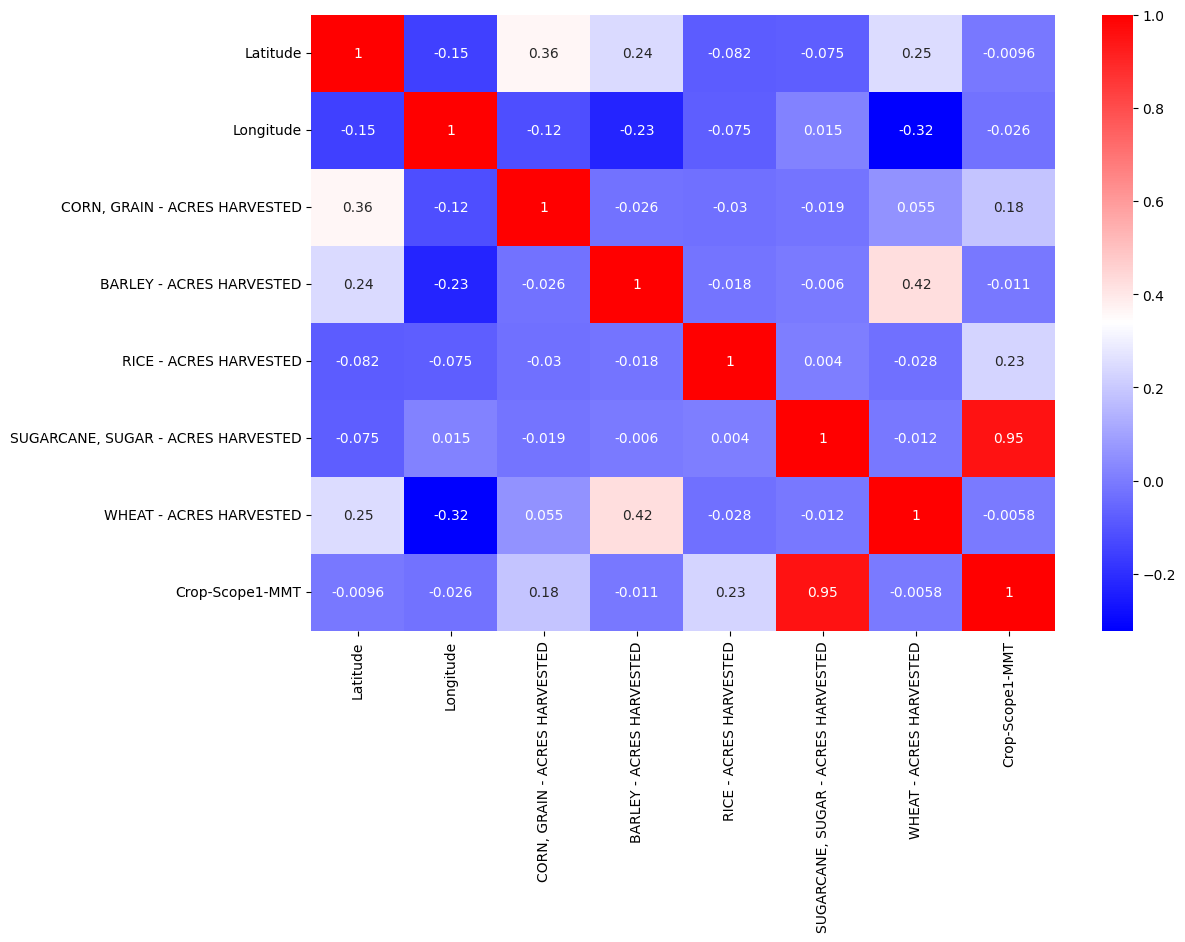

In [76]:
plt.figure(figsize = (12,8))
sns.heatmap(df1.corr(), cmap ='bwr', annot = True)

Rice and corn shows positive correlation to the emissions.

Interestingly we have sugarcane which shows positive correlation and that too highest

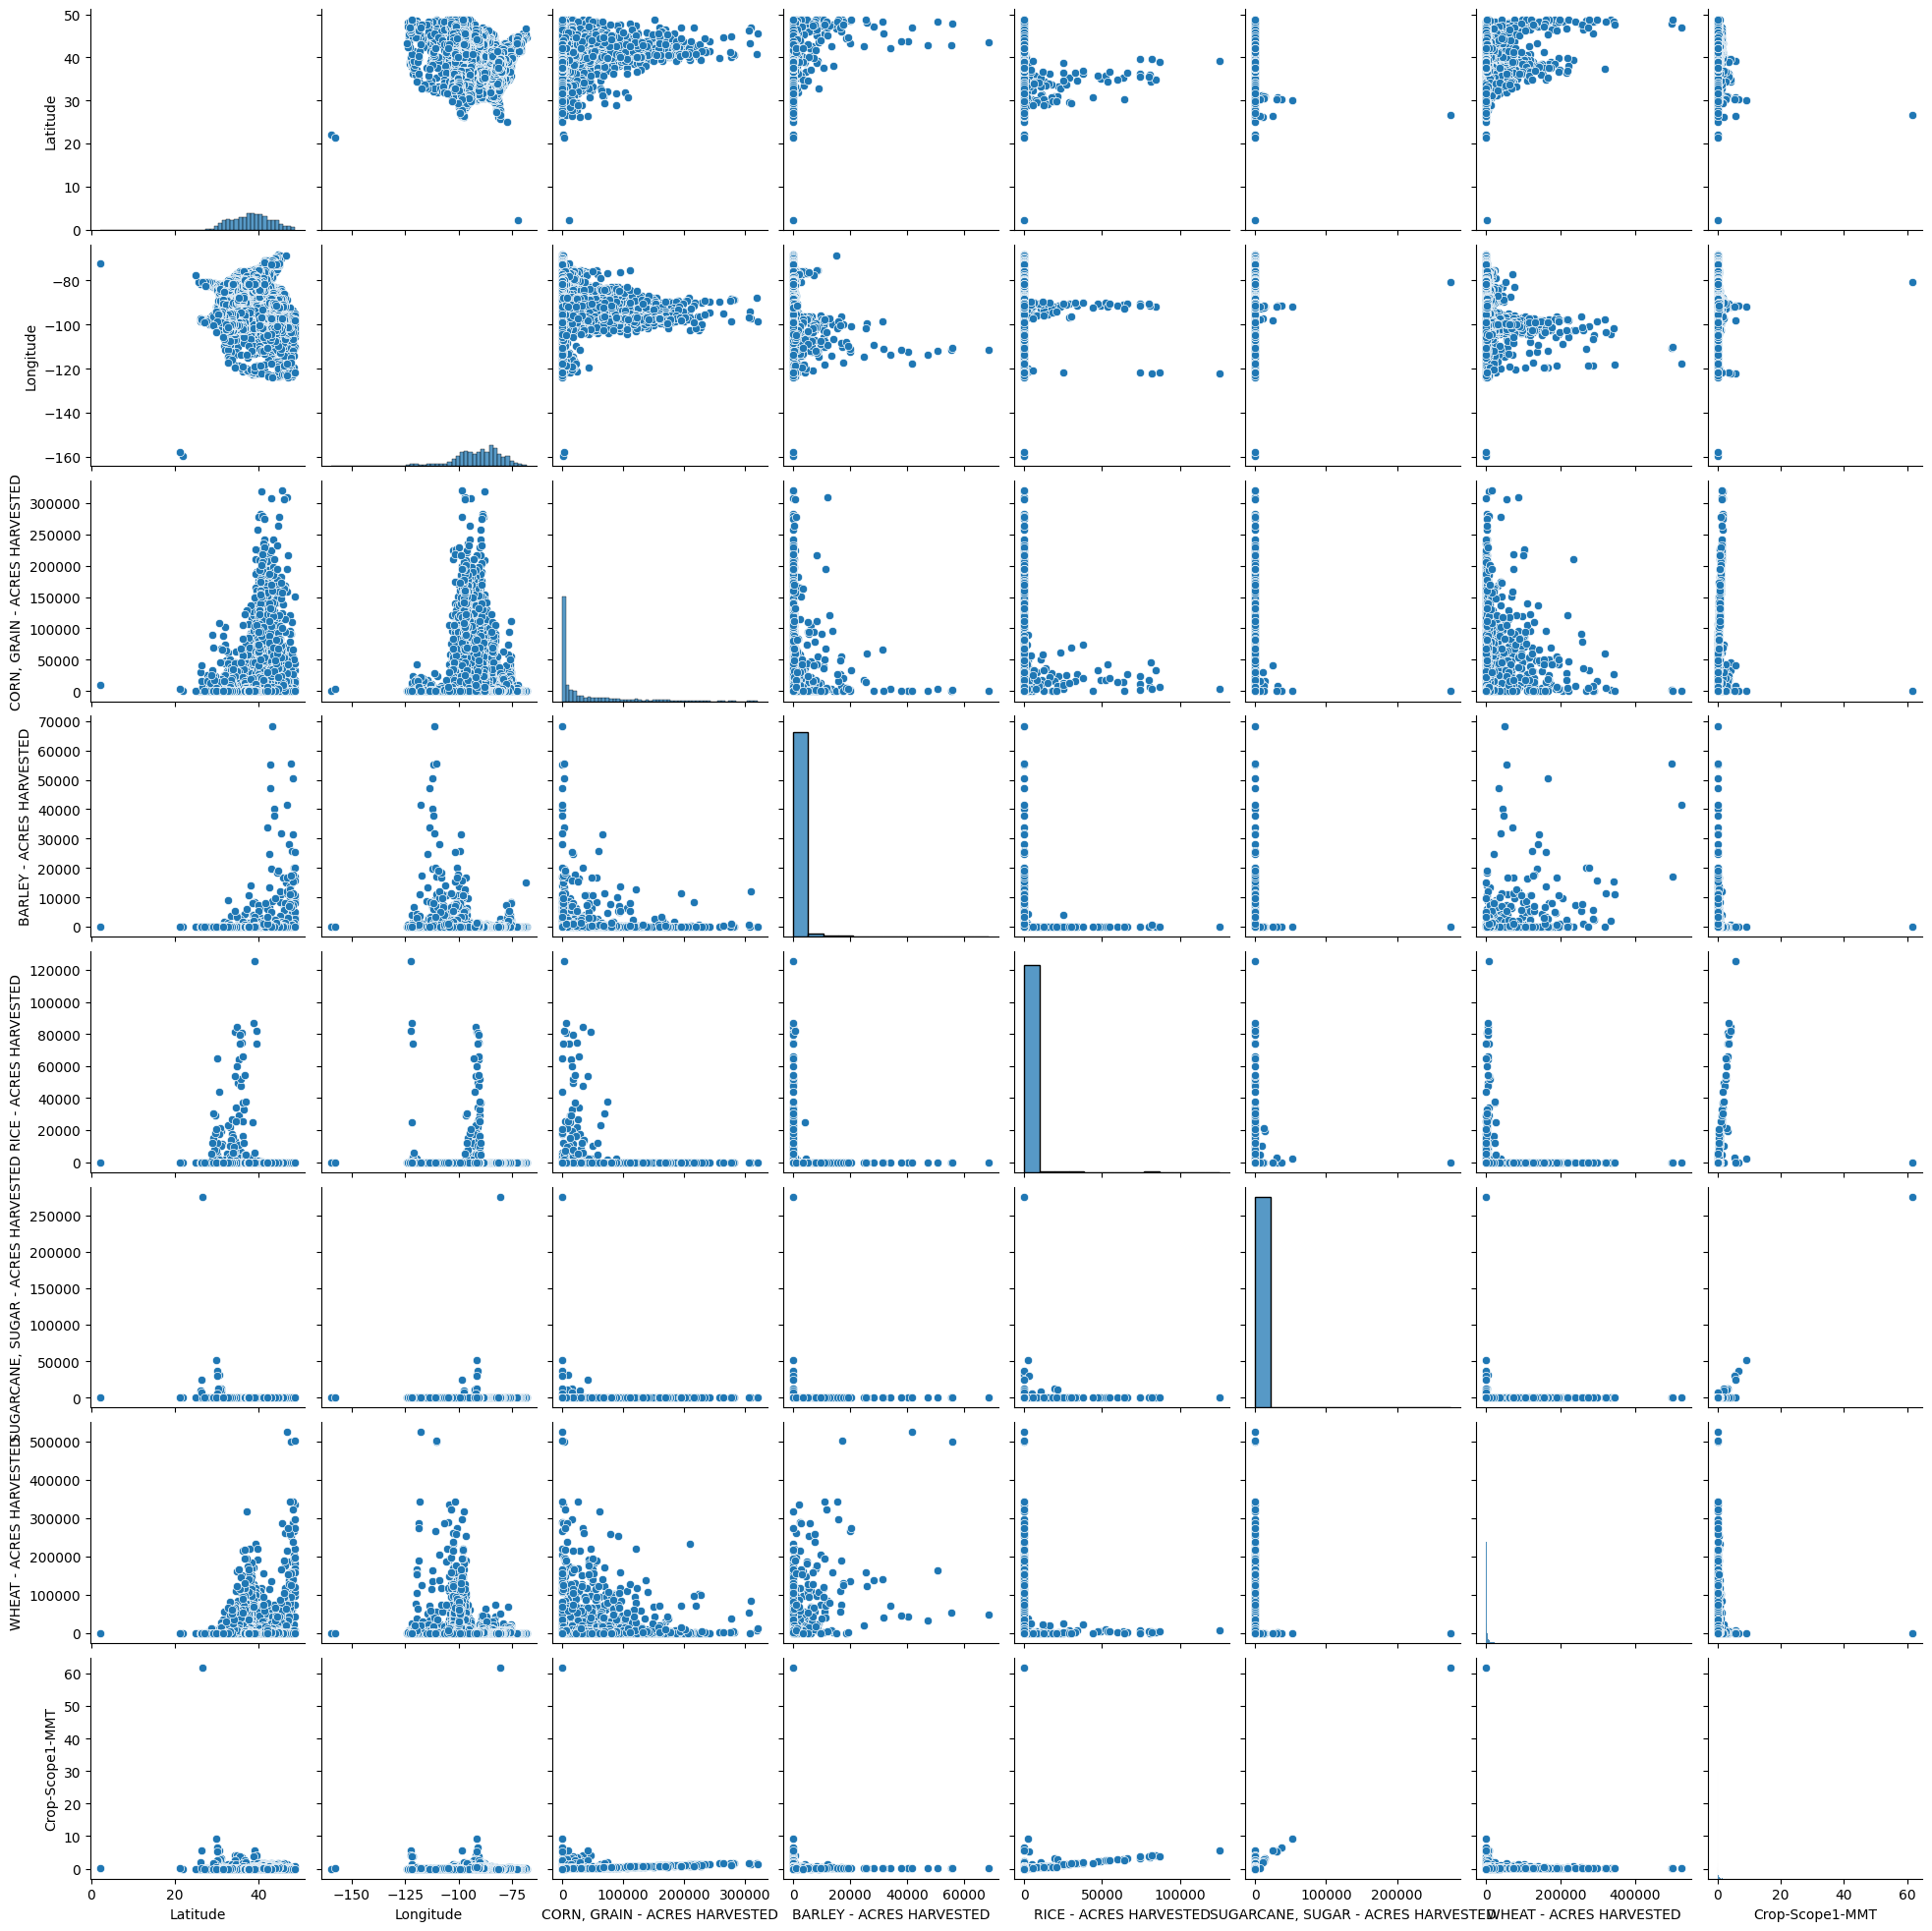

In [77]:
sns.pairplot(df1)

In [78]:
# # Select the input features (X) and target variables (y)
# X = df1[['Latitude', 'Longitude','CORN, GRAIN - ACRES HARVESTED', 'CORN Production in Kg',
#        'BARLEY - ACRES HARVESTED', 'BARLEY PRODUCTION IN Kg',
#        'RICE - ACRES HARVESTED', 'Rice Production in Kg',
#        'SUGARCANE, SUGAR - ACRES HARVESTED', 'SUGAR PRODUCTION in KG',
#        'WHEAT - ACRES HARVESTED', 'Wheat Production measured in Kg',
#        'precipitation_cm', 'Corn-LUC', 'Corn-Farm', 'Corn-EUTROPHYING',
#        'BARLEY-LUC', 'Barley-Farm', 'BARLEY-EUTROPHYING', 'RICE-LUC',
#        'Rice-Farm', 'Rice- Eutrophication', 'Sugarcane- LUC', 'Sugarcane-Farm',
#        'Sugarcane-Eutrophication', 'Wheat-LUC', 'Wheat-Farm',
#        'Wheat-Eutrophication']]
# y = df1[['Crop-Scope1-MMT']]

In [80]:
# Define the transformation functions
def calculate_x(lat, lon):
    return np.cos(np.radians(lat)) * np.cos(np.radians(lon))

def calculate_y(lat, lon):
    return np.cos(np.radians(lat)) * np.sin(np.radians(lon))

def calculate_z(lat):
    return np.sin(np.radians(lat))

# Apply the transformation functions to create new columns
df1['x'] = df1.apply(lambda row: calculate_x(row['Latitude'], row['Longitude']), axis=1)
df1['y'] = df1.apply(lambda row: calculate_y(row['Latitude'], row['Longitude']), axis=1)
df1['z'] = df1['Latitude'].apply(calculate_z)

# Print the updated dataframe
df1.head()

,Latitude,Longitude,"CORN, GRAIN - ACRES HARVESTED",BARLEY - ACRES HARVESTED,RICE - ACRES HARVESTED,"SUGARCANE, SUGAR - ACRES HARVESTED",WHEAT - ACRES HARVESTED,Crop-Scope1-MMT,x,y,z
0,32.52,-86.63,645.0,0.0,0.0,0.0,334.0,0.00,0.049567,-0.841746,0.537594
1,32.10,-85.71,1292.0,0.0,0.0,0.0,0.0,0.00,0.063369,-0.844748,0.531399
2,32.31,-87.10,13876.0,0.0,0.0,0.0,0.0,0.05,0.042760,-0.844086,0.534500
3,32.58,-86.13,2487.0,0.0,0.0,0.0,0.0,0.01,0.056872,-0.840719,0.538477
4,32.86,-87.99,34.0,0.0,0.0,0.0,0.0,0.00,0.029462,-0.839482,0.542588


In [81]:
# Select the input features (X) and target variables (y)
X = df1[['x','y','z','CORN, GRAIN - ACRES HARVESTED',
       'BARLEY - ACRES HARVESTED',
       'RICE - ACRES HARVESTED',
       'SUGARCANE, SUGAR - ACRES HARVESTED',
       'WHEAT - ACRES HARVESTED']]
y = df1[['Crop-Scope1-MMT']]

In [82]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# creating the Evaluation function to give all the metrics after the model training

In [83]:
def evaluate_model(true, predicted):
  mae = mean_absolute_error(true, predicted)
  r2 = r2_score(true, predicted)

In [101]:
X_train

array([[ 2.46270782e-01, -6.70427416e-01,  6.99912696e-01, ...,
         0.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 2.20921197e-03, -7.91113705e-01,  6.11665125e-01, ...,
         0.00000000e+00,  0.00000000e+00,  7.91600000e+03],
       [-5.95572338e-02, -7.82946933e-01,  6.19231004e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.30480000e+04],
       ...,
       [-6.86110966e-02, -6.74293085e-01,  7.35269578e-01, ...,
         0.00000000e+00,  0.00000000e+00,  2.48080000e+04],
       [-4.16392956e-02, -7.66370546e-01,  6.41047857e-01, ...,
         0.00000000e+00,  0.00000000e+00,  5.59600000e+03],
       [ 4.98816236e-02, -7.97286656e-01,  6.01536210e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.66720000e+04]])

In [85]:
# Perform necessary transformations
# Scaling numerical features
#numeric_features = ['cotton_area', 'Corn_area', 'SORGHUM_ACRES', 'precipitation_cm_x']
#numeric_transformer = MinMaxScaler()

In [86]:
# One-hot encoding categorical features
#categorical_features = ['Ag District']
#categorical_transformer = OneHotEncoder(drop='first')


In [87]:
# Apply transformations using ColumnTransformer
'''preprocessor = ColumnTransformer(
    transformers=[
        #('num', numeric_transformer, numeric_features),
        #('cat', categorical_transformer, categorical_features)
    ])'''

"preprocessor = ColumnTransformer(\n    transformers=[\n        #('num', numeric_transformer, numeric_features),\n        #('cat', categorical_transformer, categorical_features)\n    ])"

In [88]:
preprocessor = ColumnTransformer( transformers = [],
                remainder="passthrough"
            )


In [89]:
X_train = preprocessor.fit_transform(X_train)

In [90]:
# Create an instance of the LinearRegression model
model = DecisionTreeRegressor()


In [91]:
# Fit and transform the data
#X_transformed_train = preprocessor.fit_transform(X_train)
#X_transformed_test =  preprocessor.fit_transform(X_test)

In [92]:
X_train

array([[ 2.46270782e-01, -6.70427416e-01,  6.99912696e-01, ...,
         0.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 2.20921197e-03, -7.91113705e-01,  6.11665125e-01, ...,
         0.00000000e+00,  0.00000000e+00,  7.91600000e+03],
       [-5.95572338e-02, -7.82946933e-01,  6.19231004e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.30480000e+04],
       ...,
       [-6.86110966e-02, -6.74293085e-01,  7.35269578e-01, ...,
         0.00000000e+00,  0.00000000e+00,  2.48080000e+04],
       [-4.16392956e-02, -7.66370546e-01,  6.41047857e-01, ...,
         0.00000000e+00,  0.00000000e+00,  5.59600000e+03],
       [ 4.98816236e-02, -7.97286656e-01,  6.01536210e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.66720000e+04]])

In [93]:
# Fit the model to the transformed dataset
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [94]:
# Predict the target variables
y_pred = model.predict(X_test)


In [95]:
# Print the predicted target variables
pd.DataFrame(y_pred)

,0
0,0.33
1,0.69
2,0.14
3,0.00
4,0.03
...,...
536,0.00
537,0.45
538,0.00
539,0.00


In [96]:
y_test

,Crop-Scope1-MMT
1106,0.37
439,0.71
801,0.15
296,0.00
1718,0.04
...,...
1190,0.00
2369,0.39
2543,0.00
1904,0.00


In [97]:
model.score(X_test, y_test)

0.8615725694111582

In [98]:
model.score(X_train, y_train)

1.0

In [47]:
df1.to_csv('data.csv')

In [48]:
from sklearn import tree

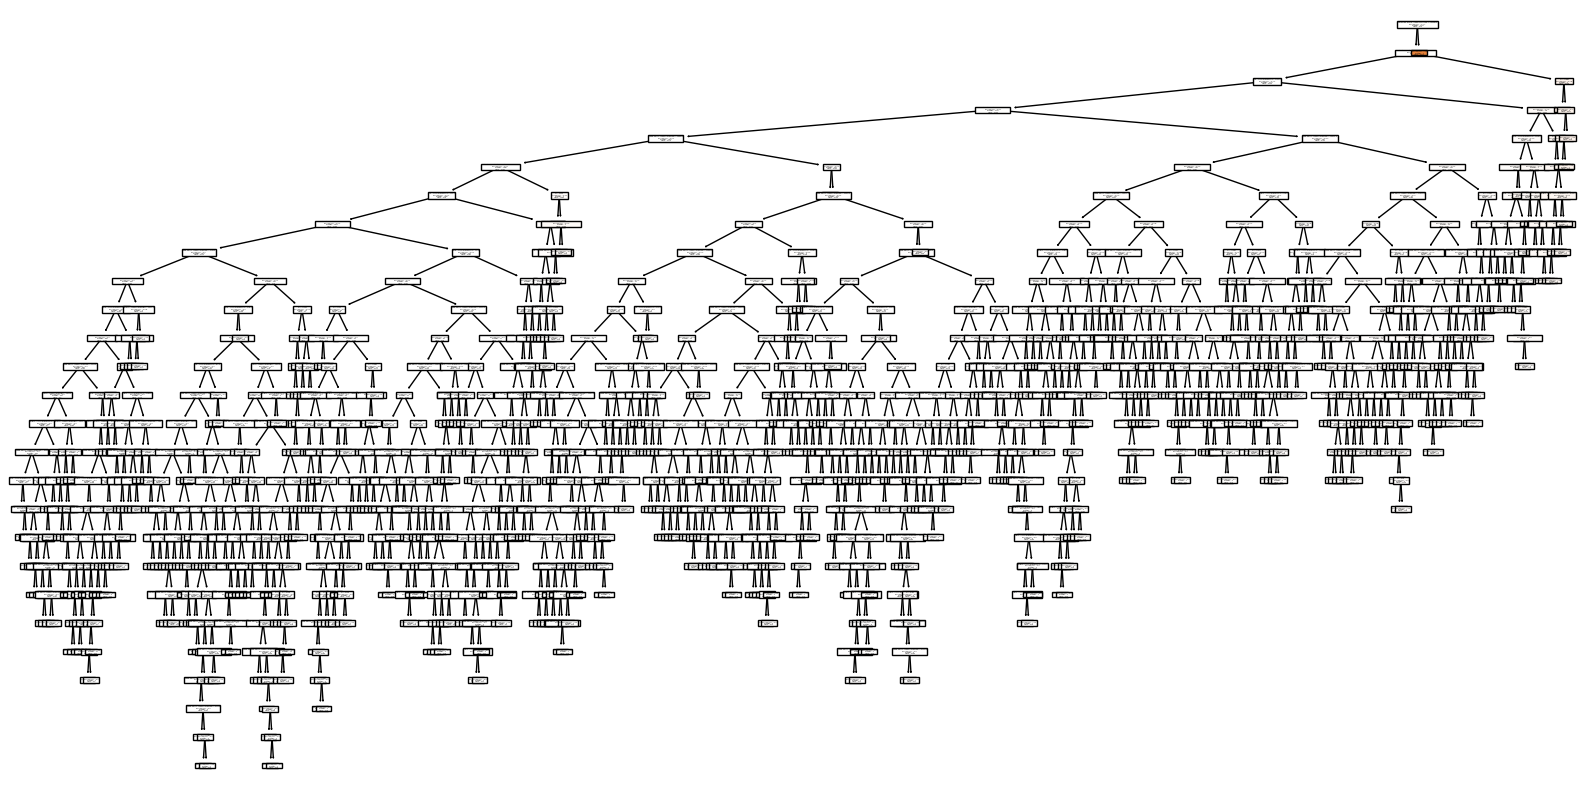

In [99]:
fig = plt.figure(figsize=(20, 10))
_ = tree.plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

In [50]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_5 <= 163666.50
|   |--- feature_5 <= 20697.50
|   |   |--- feature_4 <= 21031.00
|   |   |   |--- feature_2 <= 85034.00
|   |   |   |   |--- feature_2 <= 28884.00
|   |   |   |   |   |--- feature_5 <= 3175.00
|   |   |   |   |   |   |--- feature_4 <= 5653.00
|   |   |   |   |   |   |   |--- feature_2 <= 10670.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 2762.00
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 339157.00
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 1736.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  1736.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_6 >  339157.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 47.25
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.29]
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  47.25
|   |   |

In [51]:
model.feature_importances_

array([9.77201676e-04, 2.24177671e-03, 3.49038521e-02, 3.45265477e-05,
       4.38192155e-02, 9.16865895e-01, 1.15753213e-03])

In [102]:
X

,x,y,z,"CORN, GRAIN - ACRES HARVESTED",BARLEY - ACRES HARVESTED,RICE - ACRES HARVESTED,"SUGARCANE, SUGAR - ACRES HARVESTED",WHEAT - ACRES HARVESTED
0,0.049567,-0.841746,0.537594,645.0,0.0,0.0,0.0,334.0
1,0.063369,-0.844748,0.531399,1292.0,0.0,0.0,0.0,0.0
2,0.042760,-0.844086,0.534500,13876.0,0.0,0.0,0.0,0.0
3,0.056872,-0.840719,0.538477,2487.0,0.0,0.0,0.0,0.0
4,0.029462,-0.839482,0.542588,34.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2700,-0.183982,-0.719166,0.670038,29885.0,1190.0,0.0,0.0,13640.0
2701,-0.201873,-0.723514,0.660133,17181.0,1128.0,0.0,0.0,73299.0
2702,-0.182592,-0.708071,0.682126,0.0,0.0,0.0,0.0,2796.0
2703,-0.191943,-0.716840,0.670297,6606.0,1017.0,0.0,0.0,7591.0


In [108]:
df1.iloc[2700,:]

Latitude                                 42.070000
Longitude                              -104.350000
CORN, GRAIN - ACRES HARVESTED         29885.000000
BARLEY - ACRES HARVESTED               1190.000000
RICE - ACRES HARVESTED                    0.000000
SUGARCANE, SUGAR - ACRES HARVESTED        0.000000
WHEAT - ACRES HARVESTED               13640.000000
Crop-Scope1-MMT                           0.130000
x                                        -0.183982
y                                        -0.719166
z                                         0.670038
Name: 2700, dtype: float64

In [112]:
model.predict([[0.13,-0.18,-0.71, 100,100,100,100,100],[0.13,-0.18,-0.71, 1000,1000,1000,1000,1000]])

array([0., 0.])

In [113]:
model2 = LinearRegression()

In [114]:
model2.fit(X_train, y_train)

LinearRegression()

In [115]:
model2.score(X_train, y_train)

0.9958322134287536

In [116]:
model2.score(X_test, y_test)

0.9689571953684224

In [118]:
model2.predict([[0.13,-0.18,-0.71, 100,100,100,100,100],[0.13,-0.18,-0.71, 1000,1000,1000,1000,1000],[0.13,-0.18,-0.71, 10000,10000,10000,10000,10000]])

array([[0.31428421],
       [0.55933506],
       [3.00984357]])

In [39]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
df3 = pd.read_csv('https://raw.githubusercontent.com/aps0611/mlproject/main/artifact/data.csv', index_col = 0)
df3.head(3)

,Latitude,Longitude,"CORN, GRAIN - ACRES HARVESTED",BARLEY - ACRES HARVESTED,RICE - ACRES HARVESTED,"SUGARCANE, SUGAR - ACRES HARVESTED",WHEAT - ACRES HARVESTED,Crop-Scope1-MMT
Unnamed: 0,,,,,,,,
0,32.52,-86.63,645.0,0.0,0.0,0.0,334.0,0.00
1,32.10,-85.71,1292.0,0.0,0.0,0.0,0.0,0.00
2,32.31,-87.10,13876.0,0.0,0.0,0.0,0.0,0.05


In [76]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
df3 = pd.read_csv('https://raw.githubusercontent.com/aps0611/mlproject/main/artifact/data.csv', index_col = 0)


def calculate_x(lat, lon):
    return np.cos(np.radians(lat)) * np.cos(np.radians(lon))

def calculate_y(lat, lon):
    return np.cos(np.radians(lat)) * np.sin(np.radians(lon))

def calculate_z(lat):
    return np.sin(np.radians(lat))

# Create the pipeline
pipeline = Pipeline([
    ('transformer', FunctionTransformer(
        func=lambda X: np.column_stack([
            calculate_x(X.iloc[:, 0], X.iloc[:, 1]),
            calculate_y(X.iloc[:, 0], X.iloc[:, 1]),
            calculate_z(X.iloc[:, 0])
        ]),
        validate=False
    ))
])

# Apply the pipeline to transform the dataframe
transformed_data = pipeline.fit_transform(df3[['Latitude', 'Longitude']])

# Create a new dataframe with transformed coordinates
new_df = pd.DataFrame(
    transformed_data,
    columns=['x', 'y', 'z']
)
print(new_df)
# Drop the original latitude and longitude columns
df3 = df3.drop(['Latitude', 'Longitude'], axis=1)

# Concatenate the new dataframe with the transformed coordinates
df3= pd.concat([new_df,df3], axis=1)

# Print the updated dataframe
df3.head(5)

             x         y         z
0     0.049567 -0.841746  0.537594
1     0.063369 -0.844748  0.531399
2     0.042760 -0.844086  0.534500
3     0.056872 -0.840719  0.538477
4     0.029462 -0.839482  0.542588
...        ...       ...       ...
2700 -0.183982 -0.719166  0.670038
2701 -0.201873 -0.723514  0.660133
2702 -0.182592 -0.708071  0.682126
2703 -0.191943 -0.716840  0.670297
2704 -0.262181 -0.693109  0.671462

[2705 rows x 3 columns]


,x,y,z,"CORN, GRAIN - ACRES HARVESTED",BARLEY - ACRES HARVESTED,RICE - ACRES HARVESTED,"SUGARCANE, SUGAR - ACRES HARVESTED",WHEAT - ACRES HARVESTED,Crop-Scope1-MMT
0,0.049567,-0.841746,0.537594,645.0,0.0,0.0,0.0,334.0,0.00
1,0.063369,-0.844748,0.531399,1292.0,0.0,0.0,0.0,0.0,0.00
2,0.042760,-0.844086,0.534500,13876.0,0.0,0.0,0.0,0.0,0.05
3,0.056872,-0.840719,0.538477,2487.0,0.0,0.0,0.0,0.0,0.01
4,0.029462,-0.839482,0.542588,34.0,0.0,0.0,0.0,0.0,0.00


In [45]:
H

In [70]:
def get_data_transformer_object():
  def calculate_x(lat, lon):
    return np.cos(np.radians(lat)) * np.cos(np.radians(lon))

  def calculate_y(lat, lon):
    return np.cos(np.radians(lat)) * np.sin(np.radians(lon))

  def calculate_z(lat):
    return np.sin(np.radians(lat))

  pipeline = Pipeline([('transformer', FunctionTransformer(
                    func=lambda X: np.column_stack([
                        calculate_x(X[:, 0], X[:, 1]),
                        calculate_y(X[:, 0], X[:, 1]),
                        calculate_z(X[:, 0])
                    ]),
                    validate=False
                ))
            ])

  return pipeline



def initiate_data_transformation(train_df):
  preprocessing_obj = get_data_transformer_object()

  target_column_name = 'Crop-Scope1-MMT'

            #############
            ############# this is my df3####################
  input_feature_train_df = train_df.drop(columns = [target_column_name], axis = 1)
  target_feature_train_df = train_df[target_column_name]




            ############# this is my transformed data#####################
  input_feature_train_arr = preprocessing_obj.transform(input_feature_train_df[['Latitude', 'Longitude']].values)




            ############## Create a new df with transformed coordinates############
  new_input_feature_train_df = pd.DataFrame(input_feature_train_arr, columns=['x', 'y', 'z'],index=input_feature_train_df.index)


            ############## Drop the original Latitude and Longitude columns #################
  input_feature_train_df = input_feature_train_df.drop(['Latitude', 'Longitude'], axis=1)


            ############# Concatenate the new df with the new columns ##################
  input_feature_train_df = pd.concat([new_input_feature_train_df,input_feature_train_df], axis =1)

  train_arr = input_feature_train_df


  return(
                train_arr.values,type(train_arr)
            )




In [71]:
train_df = pd.read_csv("https://raw.githubusercontent.com/aps0611/mlproject/main/artifact/data.csv", index_col = 0)

initiate_data_transformation(train_df)

(array([[ 4.95666318e-02, -8.41745726e-01,  5.37593975e-01, ...,
          0.00000000e+00,  0.00000000e+00,  3.34000000e+02],
        [ 6.33686877e-02, -8.44748459e-01,  5.31398580e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 4.27595622e-02, -8.44086199e-01,  5.34499867e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-1.82592255e-01, -7.08070756e-01,  6.82125995e-01, ...,
          0.00000000e+00,  0.00000000e+00,  2.79600000e+03],
        [-1.91942651e-01, -7.16840152e-01,  6.70297110e-01, ...,
          0.00000000e+00,  0.00000000e+00,  7.59100000e+03],
        [-2.62180611e-01, -6.93109057e-01,  6.71461959e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 pandas.core.frame.DataFrame)